## Liam Lindy
### DMML Lab 6 
#### Working with Text

### 1 

refer to the file 

### 2 

refer to the header

### 3

#### 3a pt 1

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import string
# May need this if not already installed
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liamlindy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/liamlindy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### 3a pt 2

In [4]:
df = pd.read_csv('dmml_survey.csv')

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
0,"buzzwordy, but needed. I'm excited to learn de...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,7.0,7.0,4.0,4.0,7.0,5.0,7.0,6.0,1.0,1.0,1.0,3.0,5.0
1,I don’t know much about them,"CSC 230 Computer Science II, CSC 301 Database ...",6.0,4.0,4.0,6.0,2.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,2.0,2.0,6.0
2,These two concepts seem intimately intertwined...,"CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,6.0,2.0,7.0,4.0
3,"To me, data mining is being able to harvest da...","CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,6.0,6.0,3.0,7.0,7.0,2.0,7.0,6.0,7.0,3.0,1.0,2.0,4.0
4,I believe data mining is looking through code ...,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,6.0,5.0,7.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0


#### 3b

In [5]:
df.head()

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
0,"buzzwordy, but needed. I'm excited to learn de...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,7.0,7.0,4.0,4.0,7.0,5.0,7.0,6.0,1.0,1.0,1.0,3.0,5.0
1,I don’t know much about them,"CSC 230 Computer Science II, CSC 301 Database ...",6.0,4.0,4.0,6.0,2.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,2.0,2.0,6.0
2,These two concepts seem intimately intertwined...,"CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,6.0,2.0,7.0,4.0
3,"To me, data mining is being able to harvest da...","CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,6.0,6.0,3.0,7.0,7.0,2.0,7.0,6.0,7.0,3.0,1.0,2.0,4.0
4,I believe data mining is looking through code ...,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,6.0,5.0,7.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0


#### 3c i

In [6]:
df.tail()

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3c ii

In [8]:
df = df.dropna()
df.tail()

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
19,"Having taken ""data mining"" in the business sch...","CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,7.0,7.0,7.0,7.0,5.0,2.0,6.0,2.0,7.0,2.0,7.0,5.0,2.0
20,I've had a bit of exposure to machine learning...,"CSC 111 Data Science and Visualization, CSC 23...",7.0,5.0,5.0,5.0,4.0,6.0,5.0,5.0,5.0,2.0,7.0,7.0,7.0,7.0,7.0
21,"Cleaning, transforming, mining data with the a...","CSC 230 Computer Science II, CSC 301 Database ...",7.0,7.0,6.0,6.0,7.0,6.0,6.0,5.0,7.0,5.0,6.0,4.0,7.0,7.0,6.0
22,Sounds cool,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,7.0,7.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,6.0,6.0,5.0,6.0
23,"I think data mining is very powerful, and can ...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,6.0,7.0,6.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,6.0,6.0,5.0


#### 3d

In [13]:
impressions = df['Impressions']
impressions.head()

0    buzzwordy, but needed. I'm excited to learn de...
1                         I don’t know much about them
2    These two concepts seem intimately intertwined...
3    To me, data mining is being able to harvest da...
4    I believe data mining is looking through code ...
Name: Impressions, dtype: object

#### 3e

In [19]:
all_docs = []
stemmer = nltk.stem.porter.PorterStemmer()

for value in impressions:
    lowered = value.lower()
    no_punc = lowered.translate(str.maketrans('','', string.punctuation))
    token = nltk.word_tokenize(no_punc)
    nonstop = [w for w in token if not w in nltk.corpus.stopwords.words('english')]

    token = [stemmer.stem(item) for item in nonstop]
    all_docs.append(token)
num_docs = len(all_docs)
print('processed', num_docs, 'documents.')
print('First doc looks like this:', all_docs[0])

processed 24 documents.
First doc looks like this: ['buzzwordi', 'need', 'im', 'excit', 'learn', 'deeper', 'method', 'data', 'mine', 'machin', 'learn', 'usual', 'see', 'machin', 'learn', 'assum', 'peopl', 'appli', 'model', 'im', 'curiou', 'well', 'learn']


#### 3f

In [21]:
tc = nltk.TextCollection(all_docs)

print('\nConcordances:')
tc.concordance('green')

# Build a frequency distribution from the TextCollection vocab 
fdist = tc.vocab() 
print('# times "green" used:', fdist['green']) 
# Number of unique words in the text 
unique_terms = list(fdist.keys()) 
num_terms = len(unique_terms) 
print('\nUnique terms:', num_terms) 
print('\nThe 10 Most common terms (automatically sorted):') 
print(fdist.most_common(10)) 


Concordances:
no matches
# times "green" used: 0

Unique terms: 168

The 10 Most common terms (automatically sorted):
[('data', 25), ('learn', 16), ('mine', 12), ('machin', 11), ('use', 9), ('im', 5), ('excit', 5), ('cours', 4), ('abl', 4), ('interest', 4)]


In [24]:
 # Make a 2D array to hold the TF-IDF scores 
TD = np.zeros((num_docs, num_terms)) 
# Note that there are a couple ways to speed this next part up, # but they sacrifice clarity for speed. 
# Loop through each document 
for i in range(num_docs): 
# Loop through each term 
    for j in range(num_terms): 
# Grab the current document from the list of all the documents 
        doc = all_docs[i] 
        # Grab the current term from the list of all the unique terms 
        term = unique_terms[j] 
        # Calculate the TF-IDF score for the current term and document # and store it in the TD array 
        TD[i, j] = tc.tf_idf(term, doc) 
print('TD matrix created.') 
print('The columns correspond to the terms:') 
print(unique_terms) 
print('\nThe first document has these TD-IDF scores:') 
print(TD[:, :80])

TD matrix created.
The columns correspond to the terms:
['buzzwordi', 'need', 'im', 'excit', 'learn', 'deeper', 'method', 'data', 'mine', 'machin', 'usual', 'see', 'assum', 'peopl', 'appli', 'model', 'curiou', 'well', '’', 'know', 'much', 'two', 'concept', 'seem', 'intim', 'intertwin', 'dm', 'part', 'cours', 'center', 'around', 'web', 'crawl', 'ml', 'math', 'base', 'less', 'code', 'tie', 'togeth', 'abl', 'harvest', 'interest', 'inform', 'make', 'decis', 'teach', 'task', 'increas', 'effici', 'accuraci', 'believ', 'look', 'tri', 'find', 'answer', 'potenti', 'question', 'program', 'improv', 'becom', 'posit', 'impress', 'innov', 'everevolv', 'fascin', 'increasingli', 'preval', 'field', 'rang', 'sale', 'financi', 'research', 'scientist', 'degre', 'predict', 'futur', 'trend', 'forward', 'use', 'work', 'problem', 'get', 'hand', 'experi', 'disciplin', 'comput', 'scienc', 'think', 'littl', 'nervou', 'will', 'put', 'autom', 'process', 'larg', 'set', 'determin', 'pattern', 'take', 'unorgan', 'con

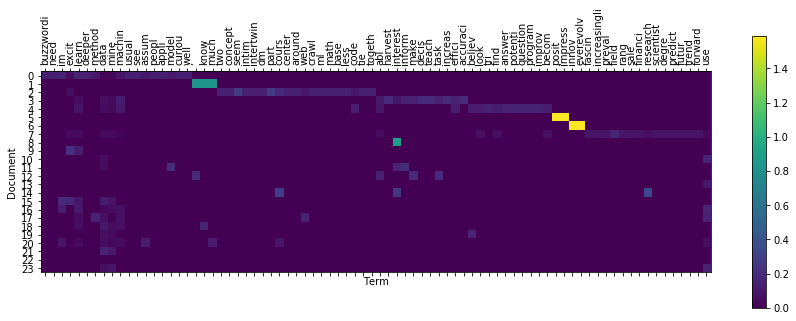

In [27]:
width = 15 
height = 5 
fig = plt.figure(figsize=(width, height)) 
ax = fig.add_subplot(111) 
cax = ax.matshow(TD[:,:80]) 
fig.colorbar(cax) 
plt.xticks(np.arange(80), unique_terms, rotation=90) 
plt.yticks(np.arange(num_docs), np.arange(num_docs)) 
plt.xlabel('Term') 
plt.ylabel('Document') 
plt.show()

#### 3g

In [28]:
# Calc distance matrix

dist = pdist(TD, metric='cosine')
dist = squareform(dist)
# Convert cosine distance to similarity
# (so that bigger numbers mean more similar)
sim = 1 - dist
print(sim.shape)

(24, 24)


array([[1.        , 0.        , 0.01291566, 0.08060203, 0.0967336 ,
        0.        , 0.        , 0.06694033, 0.        , 0.06680366,
        0.00329233, 0.05803852, 0.        , 0.        , 0.        ,
        0.17720512, 0.14500725, 0.10503553, 0.06701289, 0.00964731,
        0.14398798, 0.01610285, 0.        , 0.01248789],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14348815, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.16502268, 0.        ,
        0.12809902, 0.        , 0.        , 0.        ],
       [0.01291566, 0.        , 1.        , 0.        , 0.03683103,
        0.        , 0.        , 0.00942277, 0.        , 0.02228201,
        0.        , 0.        , 0.        , 0.        , 0.08241916,
        0.02486437, 0.        , 0.03970945, 0.        , 0.        ,
        0.04842177, 0.        , 0.        , 0.        ],
       [0.080

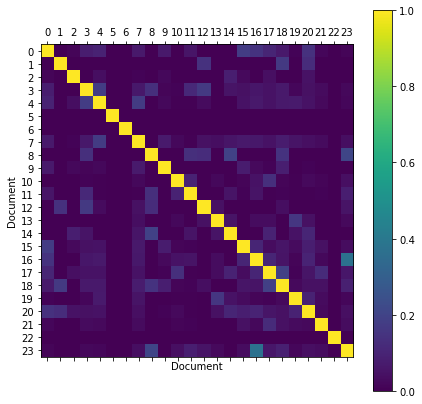

In [30]:
fig = plt.figure(figsize=(7, 7)) 
ax = fig.add_subplot(111)
cax = ax.matshow(sim) 
fig.colorbar(cax) 
plt.xticks(np.arange(num_docs), np.arange(num_docs)) 
plt.yticks(np.arange(num_docs), np.arange(num_docs))
plt.xlabel('Document') 
plt.ylabel('Document') 
plt.show() 

#### 3h

In [39]:
print('high similarity one')
print(sim[16,23])
print(all_docs[16], all_docs[23])

print('\nhigh similarity two')
print(sim[8,23])
print(all_docs[8], all_docs[23])

print('\nhigh similarity three')
print(sim[9,14])
print(all_docs[9], all_docs[14])

high similarity one
0.37335521110155123
['like', 'everyth', 'data', 'mine', 'machin', 'learn', 'use', 'bad', 'good', 'im', 'hope', 'learn', 'good', 'way', 'use'] ['think', 'data', 'mine', 'power', 'use', 'good', 'meaning', 'way']

high similarity two
0.21020939612181322
['think', 'interest'] ['think', 'data', 'mine', 'power', 'use', 'good', 'meaning', 'way']

high similarity three
0.0
['littl', 'nervou', 'will', 'put', 'work', 'excit', 'learn'] ['heard', 'cours', 'interest', 'aid', 'lot', 'research', 'topic']


#### 3i

In [41]:
print('low similarity one')
print(sim[0,5])
print(all_docs[0], all_docs[5])

print('\nlow similarity two')
print(sim[22,23])
print(all_docs[8], all_docs[23])

print('\nlow similarity three')
print(sim[3,20])
print(all_docs[3], all_docs[20])

low similarity one
0.0
['buzzwordi', 'need', 'im', 'excit', 'learn', 'deeper', 'method', 'data', 'mine', 'machin', 'learn', 'usual', 'see', 'machin', 'learn', 'assum', 'peopl', 'appli', 'model', 'im', 'curiou', 'well', 'learn'] ['posit', 'impress']

low similarity two
0.0
['think', 'interest'] ['think', 'data', 'mine', 'power', 'use', 'good', 'meaning', 'way']

low similarity three
0.04686366855618673
['data', 'mine', 'abl', 'harvest', 'data', 'interest', 'inform', 'make', 'decis', 'machin', 'learn', 'teach', 'machin', 'task', 'increas', 'effici', 'accuraci'] ['ive', 'bit', 'exposur', 'machin', 'learn', 'busi', 'use', 'prior', 'internship', 'much', 'handson', 'im', 'assum', 'big', 'data', 'import', 'topic', 'cours', 'come', 'data', 'mine']
